<a href="https://colab.research.google.com/github/ScriptSherpa/DS-SEM5-PERSONA-OUTPUTS/blob/main/DS_EXP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NIKHIL MALVI
B 50



### **Explanation of the Boston Housing Price Prediction Code:**

In this code, we performed a **Linear Regression** to predict housing prices using the Boston Housing dataset. Here's a breakdown of each step:

1. **Data Preprocessing**:
   - We started by **loading the dataset** and checking for any missing values.
   - Any missing values were filled using the **median of the respective columns** to ensure the data was complete.

2. **Feature Selection**:
   - We separated the dataset into **features (X)** and the **target variable (y)**. The target variable is the **median house value** (`MedHouseVal`), while the features include various attributes like the average number of rooms, crime rate, etc.

3. **Data Splitting**:
   - We split the dataset into **training (80%)** and **testing (20%)** sets using `train_test_split` to evaluate the model's performance on unseen data.

4. **Model Training**:
   - We applied **Linear Regression** using Scikit-learn's `LinearRegression()` to model the relationship between the features and the target variable.
   - The model was trained using the **training data** (`X_train`, `y_train`).

5. **Prediction**:
   - After training the model, we used it to **predict housing prices** on the test set (`X_test`).

6. **Model Evaluation**:
   - We evaluated the model's performance using **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)**. These metrics help us understand how well the model performed:
     - **MSE**: Measures the average squared difference between predicted and actual values.
     - **RMSE**: The square root of MSE; gives error in the original units of the target variable.
     - **R²**: Indicates how well the model's predictions match the actual values.

7. **Visualization**:
   - A **scatter plot** was created to visualize the **actual vs predicted values**. The **red line** represents the ideal case where predicted values equal actual values. The scatter points indicate the model's prediction, and the closer they are to the red line, the better the model.

---


In [2]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()

# Create DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # Add target variable

# Show first few rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Ensure this import is present
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fill any missing values in the dataset with the median value of each column
df.fillna(df.median(), inplace=True)

# Separate the dataset into features (X) and target variable (y)
X = df.drop(columns=["MedHouseVal"])  # Features (all columns except target for California Housing)
y = df["MedHouseVal"]  # Target variable (Median house value for California Housing)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict the house values for the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)          # Mean Squared Error
rmse = np.sqrt(mse)                               # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)                     # R² Score (Goodness of fit)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R-squared (R²): 0.5757877060324508


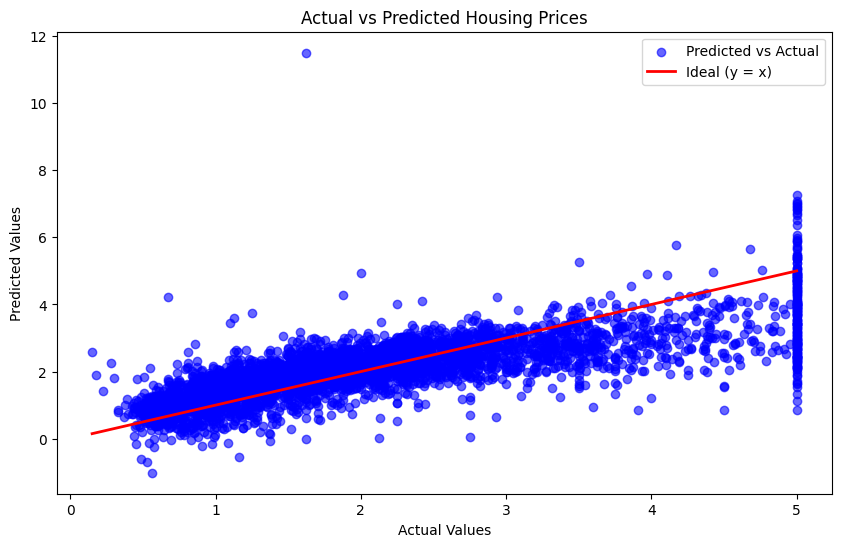

In [6]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot: Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

# Red line: Perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label="Ideal (y = x)")

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Housing Prices')
plt.legend()

# Display the plot
plt.show()
